<a href="https://colab.research.google.com/github/MeilinaR/aml/blob/main/Copy_of_aml_draft_meilina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup
Run the cells below only once

In [1]:
# The two flags below are used to check whether certain actions have already 
# taken place, as doing them again will result in unwanted behaviour.
has_cloned = False          # Whether the repository has been cloned
has_altered_sonnet = False  # Whether the sonnet package has been changed

In [ ]:
# The following line disables cell output (as it makes the notebook chaotic)
%%capture capt
assert not has_cloned
!git clone https://github.com/MeilinaR/aml.git
!pip install dm-sonnet
!pip install tensorflow
!pip install mock

%tensorflow_version 1.x
has_cloned = True

In [ ]:
cd aml/

/content/aml


In [ ]:
# See https://github.com/deepmind/learning-to-learn/issues/21#issuecomment-358856551
assert not has_altered_sonnet
!sed '328i\    normalization_build_kwargs["is_training"] = True' /tensorflow-1.15.2/python3.7/sonnet/python/modules/nets/convnet.py > /tensorflow-1.15.2/python3.7/sonnet/python/modules/nets/convnet.py.tmp
! mv /tensorflow-1.15.2/python3.7/sonnet/python/modules/nets/convnet.py.tmp /tensorflow-1.15.2/python3.7/sonnet/python/modules/nets/convnet.py
has_altered_sonnet = True

# Training
See the `ReadMe.md` for more details on the specific flags. Our modified optimizer can be accessed with the `--use-aml` flag, but this has not been fully implemented yet.

In [ ]:
!python train.py --problem=quadratic --save_path=./quadratic 

In [ ]:
!python train.py --problem=mnist --save_path=./mnist

# Evaluation
For saved optimizers, use `--path=./saved_optimizers/{PROBLEM}`. For optimizers that you just created using the Training cells above, use `--path=./{PROBLEM}`

In [ ]:
!python evaluate.py --problem=quadratic --optimizer=L2L --path=./saved_optimizers/quadratic


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W1214 13:37:27.824703 139647045990272 module_wrapper.py:139] From /content/aml/meta.py:82: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

Optimizee variables
['x:0']
Problem variables
['w:0', 'y:0']

W1214 13:37:27.856096 139647045990272 module_wrapper.py:139] From /content/aml/meta.py:184: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.


W1214 13:37:27.856896 139647045990272 module_wrapper.py:139] From /tensorflow-1.15.2/python3.7/sonnet/python/modules/base.py:177: The name tf.make_template is deprecated. Please use tf.compat.v1.make_template 

In [ ]:
!python evaluate.py --problem=quadratic --optimizer=Adam


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W1214 13:57:11.994720 139800776963968 module_wrapper.py:139] From /content/aml/problems.py:78: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.


W1214 13:57:12.026522 139800776963968 module_wrapper.py:139] From evaluate.py:61: The name tf.get_collection is deprecated. Please use tf.compat.v1.get_collection instead.


W1214 13:57:12.026829 139800776963968 module_wrapper.py:139] From evaluate.py:62: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.


W1214 13:57:12.028084 139800776963968 module_wrapper.py:139] From evaluate.py:64: The na

In [ ]:
!python evaluate.py --problem=mnist --optimizer=L2L --path=./saved_optimizers/mnist


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W1214 14:06:58.699313 140424644708224 deprecation.py:323] From /content/aml/problems.py:155: load_mnist (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W1214 14:06:58.699534 140424644708224 deprecation.py:323] From /tensorflow-1.15.2/python

In [ ]:
!python evaluate.py --problem=mnist --optimizer=Adam


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W1214 14:13:49.862335 140348253566848 deprecation.py:323] From /content/aml/problems.py:155: load_mnist (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W1214 14:13:49.862557 140348253566848 deprecation.py:323] From /tensorflow-1.15.2/python

# Plotting

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def load_history(filename: str):
    data = np.loadtxt(f"saved_histories/{filename}", delimiter=',', skiprows=1)
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    return means, stds

def make_history_plot(label_to_filename: dict, title: str):
    fig = plt.figure(figsize=[5,3])
    for label, filename in label_to_filename.items():
        means, stds = load_history(filename)
        plt.plot(means, label=label)
        fill_between(means, stds)

    plt.title(title, fontsize=18)
    plt.xlabel("Step", fontsize=16), plt.ylabel("Cost", fontsize=16)
    plt.legend(), plt.yscale('log')
    plt.show()

fill_between = lambda m, s: plt.fill_between(range(len(m)), y1=m-s, y2=m+s, alpha=0.5)

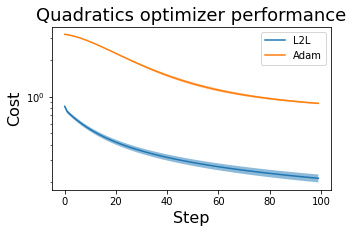

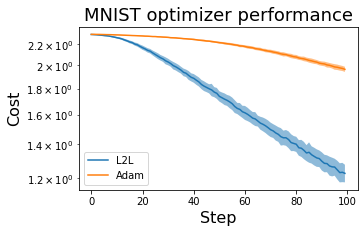

In [ ]:
quadratics = {
    'L2L': 'quadratic_L2L.csv',
    'Adam': 'quadratic_Adam.csv'
}
make_history_plot(quadratics, "Quadratics optimizer performance")
mnist = {
    'L2L': 'mnist_L2L.csv',
    'Adam': 'mnist_Adam.csv'
}
make_history_plot(mnist, "MNIST optimizer performance")

# Git commands

In [ ]:
!git reset --hard HEAD

HEAD is now at 14752ca map costs to string when writing to file


In [ ]:
!git pull

Updating 14752ca..52460c4
Fast-forward
 evaluate.py | 2 +-
 util.py     | 1 +
 2 files changed, 2 insertions(+), 1 deletion(-)


In [ ]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   evaluate.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	__pycache__/
	quadratic/
	saved_histories/

no changes added to commit (use "git add" and/or "git commit -a")
